In [52]:
import tensorflow as tf

# Build the model - CNN

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Activation, Flatten, Dense

In [54]:
model=Sequential()

model.add(Conv2D(64, kernel_size=(3,3), input_shape=(256,256,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(128, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Flatten())

from tensorflow.keras.layers import Dropout

# ANN
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(1))
model.add(Activation('sigmoid'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 254, 254, 64)      1792      
_________________________________________________________________
activation_18 (Activation)   (None, 254, 254, 64)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 84, 84, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 82, 82, 64)        36928     
_________________________________________________________________
activation_19 (Activation)   (None, 82, 82, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 27, 27, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 128)      

In [56]:
from tensorflow.keras.optimizers import RMSprop
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.optimizers import SGD

model.compile(
            optimizer=RMSprop(),
            loss='binary_crossentropy',
            metrics=['accuracy']
)

# Read the Dataset

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range = 15,
    zoom_range = 0.1, 
)


validation_datagen = ImageDataGenerator(
    rescale=1/255,
)

In [59]:
BATCH_SIZE = 16


train_generator = train_datagen.flow_from_directory(
'cats_dogs_2000_images/train/',
    target_size=(256,256),
    batch_size= BATCH_SIZE,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
'cats_dogs_2000_images/validation/',
    target_size=(256,256),
    batch_size= BATCH_SIZE,
    class_mode='binary'
)

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [60]:
history = model.fit(
                   train_generator,
                   steps_per_epoch=1602//BATCH_SIZE,
                   epochs=10,
                   validation_data=validation_generator,
                   validation_steps=400//BATCH_SIZE
                   )

Epoch 1/10
100/100 [==============================] - 94s 941ms/step - loss: 0.6998 - accuracy: 0.5063 - val_loss: 0.6893 - val_accuracy: 0.5350
Epoch 2/10
100/100 [==============================] - 88s 879ms/step - loss: 0.6918 - accuracy: 0.5763 - val_loss: 0.6652 - val_accuracy: 0.5675
Epoch 3/10
100/100 [==============================] - 86s 857ms/step - loss: 0.6754 - accuracy: 0.6047 - val_loss: 0.6593 - val_accuracy: 0.5575
Epoch 4/10
100/100 [==============================] - 91s 912ms/step - loss: 0.6343 - accuracy: 0.6532 - val_loss: 0.6357 - val_accuracy: 0.6150
Epoch 5/10
100/100 [==============================] - 90s 898ms/step - loss: 0.6134 - accuracy: 0.6702 - val_loss: 0.5919 - val_accuracy: 0.6425
Epoch 6/10
100/100 [==============================] - 79s 794ms/step - loss: 0.5963 - accuracy: 0.7011 - val_loss: 0.5586 - val_accuracy: 0.7300
Epoch 7/10
100/100 [==============================] - 78s 778ms/step - loss: 0.5715 - accuracy: 0.7175 - val_loss: 0.6008 - val_ac

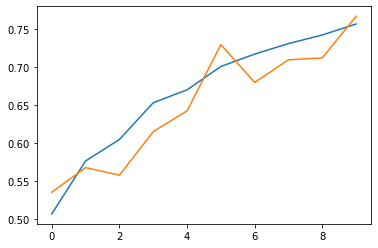

In [61]:
import matplotlib.pyplot as plt
plt.plot(range(10),history.history['accuracy'])
plt.plot(range(10),history.history['val_accuracy'])

In [62]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

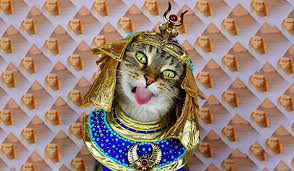

In [63]:
img = load_img('cat7.jpg')
img

In [64]:
x = img_to_array(img.resize([256,256]))
x= x.reshape((1,) + x.shape)

In [65]:
if(model.predict(x)==0):
    print('cat')
else:
    print('dog')

cat
